<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Week%2014/Tugas_14_DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Penerapan DBSCAN pada cluster spherical data.

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/aricahyasaputra/data-sains-course-assigment-/main/Week%2014/LOL%20Worlds%202018%20Knockout%20stage%20-%20Player%20Ratings.csv")

# melihat dataset
df.head()


,Name,Team,Position,KDA Ratio,Kills(Total),Deaths(Total),Assists(Total),Kill Participation,CS(Per Minute),CS(Total),Minutes Played,Games Played
0,Rookie,IG,Mid,9.2,44,14,85,0.69,8.6,2996,346,11
1,Baolan,IG,Support,9.1,12,15,124,0.73,1.4,474,346,11
2,iBoy,EDG,ADC,7.0,14,5,21,0.73,10.0,1344,134,4
3,Rekkles,FNC,ADC,6.8,33,13,55,0.70,10.1,3173,313,10
4,JackeyLove,IG,ADC,6.5,59,19,64,0.66,10.5,3634,346,11


In [11]:
data = df.iloc[:, [4, 5]].values.tolist()
data

[[44, 14],
 [12, 15],
 [14, 5],
 [33, 13],
 [59, 19],
 [34, 21],
 [18, 11],
 [38, 24],
 [31, 20],
 [17, 9],
 [9, 8],
 [12, 9],
 [3, 9],
 [15, 14],
 [13, 10],
 [26, 17],
 [4, 18],
 [17, 21],
 [28, 19],
 [2, 20],
 [7, 9],
 [19, 19],
 [11, 8],
 [5, 8],
 [30, 35],
 [5, 10],
 [14, 11],
 [4, 36],
 [19, 19],
 [26, 33],
 [8, 13],
 [8, 11],
 [8, 10],
 [2, 3],
 [8, 8],
 [2, 7],
 [0, 3],
 [1, 12],
 [9, 23],
 [1, 18],
 [0, 16],
 [7, 14],
 [1, 3],
 [0, 1]]

In [14]:
# import data
centers = data
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
X

array([[-4.42051406e-01, -4.11895896e-01],
       [ 1.23263923e+00,  6.78531020e-01],
       [-6.80254163e-02, -5.69008370e-01],
       [ 1.46451871e-01,  9.05863245e-01],
       [ 2.57013375e-01, -6.63271140e-01],
       [ 1.03456493e+00,  6.11038706e-01],
       [-3.24724374e-01, -7.67883836e-01],
       [-1.09046334e+00, -1.64178115e+00],
       [-4.76177663e-01, -4.26355171e-01],
       [-4.61658918e-01, -5.69927006e-01],
       [-7.81683338e-01,  2.77291320e+00],
       [ 1.78338589e+00,  1.26293027e+00],
       [ 1.29834998e+00,  8.05955212e-01],
       [ 3.38081347e-01,  6.65674150e-01],
       [ 8.69248404e-01,  3.05865507e-01],
       [-8.58650539e-01, -6.03281218e-01],
       [ 2.61256971e-01, -4.40498012e-01],
       [-4.68293340e-01, -4.47637905e-01],
       [-1.05278324e+00, -3.00213223e-01],
       [ 1.46938358e+00,  8.09537392e-01],
       [-1.78698524e-01,  1.21252407e-01],
       [ 1.73194343e+00,  1.21163352e+00],
       [-1.03744974e+00, -1.45019431e+00],
       [-1.

In [15]:
# Menghitung DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [16]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 13
Estimated number of noise points: 0
Homogeneity: 0.513
Completeness: 1.000
V-measure: 0.678
Adjusted Rand Index: 0.126
Adjusted Mutual Information: 0.611
Silhouette Coefficient: 0.484


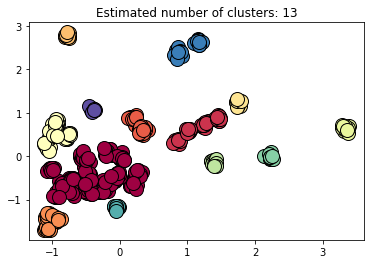

In [17]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()